## AlphaVantage for Data Fetching and analysing
Alphavantage provides real time stock exchange data and process the data. We will be checking the exchange rates for Euro to INR to check the data it is giving.

In [1]:
from alpha_vantage.foreignexchange import ForeignExchange as FX
exchange = FX(key='6I4799XJ5JXYVV6U')
# There is no metadata in this call
data, _ = exchange.get_currency_exchange_rate(from_currency='EUR',to_currency='INR')
data

{'1. From_Currency Code': 'EUR',
 '2. From_Currency Name': 'Euro',
 '3. To_Currency Code': 'INR',
 '4. To_Currency Name': 'Indian Rupee',
 '5. Exchange Rate': '77.99500000',
 '6. Last Refreshed': '2019-05-08 17:52:22',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '77.97300000',
 '9. Ask Price': '78.01600000'}

Analysis of the above data suggests few features which are important. The first one is the 'Last Refreshed' feature telling the last data point in our real time data analysis. 'Exchange Rate' is the current conversion value and Along with this the 'Bid Price' and 'Ask Price' are the ones determining the price of the stock in FX.

### Stock Exchange Data JP Morgan Industries
Now for the data processing and finding the anomalies we will look at continuous data with a high chance for anomaly. We picked up the current stock price of JP Morgan industries and started analysing the features.

In [2]:
from alpha_vantage.timeseries import TimeSeries as TS
stocks = TS(key='6I4799XJ5JXYVV6U', output_format='pandas')
stock_data, meta_data = stocks.get_intraday(symbol='JPM',interval='5min', outputsize='full')
stock_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-04-17 09:35:00,111.7000,112.3900,111.4400,111.4700,823755.0
2019-04-17 09:40:00,111.4500,111.8500,111.0100,111.7800,308264.0
2019-04-17 09:45:00,111.7700,111.8100,111.3400,111.6499,194985.0
2019-04-17 09:50:00,111.6450,111.7350,111.2900,111.2900,197112.0
2019-04-17 09:55:00,111.3200,111.7600,111.3200,111.5950,142218.0
2019-04-17 10:00:00,111.6000,111.9100,111.5950,111.8850,136183.0
2019-04-17 10:05:00,111.8800,112.0400,111.8150,112.0300,234010.0
2019-04-17 10:10:00,112.0300,112.0500,111.5550,111.5700,158760.0
2019-04-17 10:15:00,111.5900,111.6000,111.4100,111.4500,111678.0


Data Description will help in understanding the depth of the data and we can have closer look on the features such as 'open' and 'close'. 'high' and 'low' provides the upper and the lower limit information of the stock and the values are changing with the delta less than the scale of 0.01 or more. Thus these features can be helpful in determination of Anomaly and can help defining an algorithm.

In [15]:
stock_data.describe()
stock_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-04-17 09:35:00,111.7000,112.3900,111.4400,111.4700,823755.0
2019-04-17 09:40:00,111.4500,111.8500,111.0100,111.7800,308264.0
2019-04-17 09:45:00,111.7700,111.8100,111.3400,111.6499,194985.0
2019-04-17 09:50:00,111.6450,111.7350,111.2900,111.2900,197112.0
2019-04-17 09:55:00,111.3200,111.7600,111.3200,111.5950,142218.0
2019-04-17 10:00:00,111.6000,111.9100,111.5950,111.8850,136183.0
2019-04-17 10:05:00,111.8800,112.0400,111.8150,112.0300,234010.0
2019-04-17 10:10:00,112.0300,112.0500,111.5550,111.5700,158760.0
2019-04-17 10:15:00,111.5900,111.6000,111.4100,111.4500,111678.0


This description provides us with the information that every feature except volume have similar mean, from that we can infer that all these features have values close to each other or sometimes one feature values for the other one but not always. The value closing for the previous iteration is fed into the next iteration as the next opening bid, the high and low values are not changing by more than a scale of 1 for a particular iteration. Even if the value is 5 times the scale it will be an outlier.

### Data Visualization using matplotlib

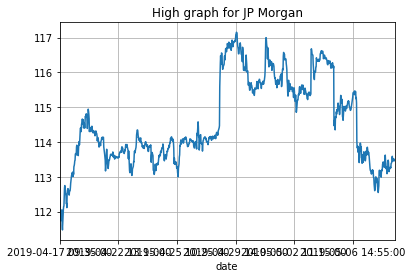

In [12]:
import matplotlib.pyplot as plt
stock_data['2. high'].plot()
plt.title('High graph for JP Morgan')
plt.grid()
plt.show()

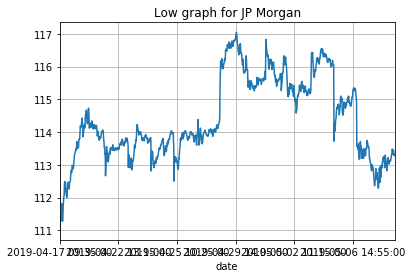

In [13]:
import matplotlib.pyplot as plt
stock_data['3. low'].plot()
plt.title('Low graph for JP Morgan')
plt.grid()
plt.show()

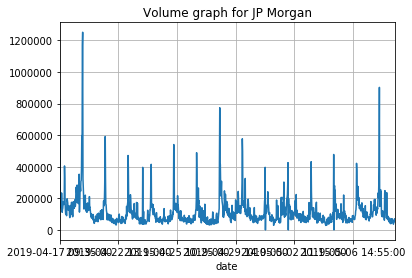

In [14]:
import matplotlib.pyplot as plt
stock_data['5. volume'].plot()
plt.title('Volume graph for JP Morgan')
plt.grid()
plt.show()